In [36]:
import networkx as nx
import osmnx as ox
import folium

import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline

import sys
# add the 'src' directory as one where we can import modules
src_dir = '/Users/frankkelly/Dropbox/Projects-new/bristol_emissions/src/'
sys.path.append(src_dir)

In [47]:
# Read graph in 
G = nx.read_gpickle('../data/graph_version_5_elevation_TL.gpkl')

In [48]:
# G.edges(data=True)

In [49]:
start_sensor = 1229225984
end_sensor = 5937922132

In [50]:
shortest_path = nx.shortest_path(G, start_sensor, end_sensor, 
                                 weight='length') 

In [51]:
# Plot it
mapa = ox.plot_route_folium(G, shortest_path)

mapa

In [52]:
shortest_path_time = nx.shortest_path(G, start_sensor, end_sensor, 
                                 weight='time_seconds') 

In [53]:
# Plot it
mapa = ox.plot_route_folium(G, shortest_path_time, route_color="blue")

mapa

In [54]:
shortest_path_pollution = nx.shortest_path(G, start_sensor, end_sensor, 
                                 weight='combined_pollution') 

In [55]:
# Plot it
mapa = ox.plot_route_folium(G, shortest_path_pollution, route_color="green")

mapa

In [20]:
from data.osmnx_functions import get_elevation
elevation = get_elevation(G, shortest_path, resolution=100)
elevation_pollution = get_elevation(G, shortest_path_pollution, resolution=100)

In [40]:
elevation[0]

{'elevation': 86.89993286132812,
 'location': {'lat': 51.46794, 'lng': -2.52258},
 'resolution': 19.08790397644043}

In [31]:
# [x['location']['lat'] for x in elevation]

In [35]:
from geopy import Nominatim  
from geopy.distance import geodesic
geolocator = Nominatim(user_agent="bristol_emissions_app")

In [46]:
elevation_df = pd.DataFrame([x['location'] for x in elevation])

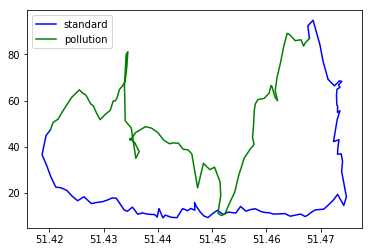

In [32]:
plt.plot([x['location']['lat'] for x in elevation], [x['elevation'] for x in elevation], "b")
plt.plot([x['location']['lat'] for x in elevation_pollution],[x['elevation'] for x in elevation_pollution], "g")
plt.legend(["standard", "pollution"])
plt.show()